In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Getting the data

In [2]:
co2 = pd.read_csv('FuelConsumptionCo2.csv')

In [3]:
co2.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Information about the data

In [4]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


#### Checking for null values

In [34]:
co2.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### Getting summary of statistics of numerical data

In [6]:
co2.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
co2.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### Dividing data into features and target

In [8]:
X, y = co2.drop(['CO2EMISSIONS'], axis=1), co2['CO2EMISSIONS']

#### Dividing features into numerical and categorical

In [45]:
num_features = ['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 
                'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
cat_features = ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE']

#### Checking unique values in categorical features

In [19]:
co2[cat_features].nunique()

MODELYEAR         1
MAKE             39
MODEL           663
VEHICLECLASS     16
CYLINDERS         7
TRANSMISSION     22
FUELTYPE          4
dtype: int64

- Since 'MODELYEAR' consists only 1 unique value and 'MODEL' has more than 50% unique values, it is better to drop these features

In [47]:
drop_features = ['MODELYEAR', 'MODEL']
cat_features = [c for c in cat_features if c not in drop_features]

#### Correlation between numerical features and target

In [40]:
corr = (X[num_features].corrwith(y)).sort_values(ascending=True)
corr

FUELCONSUMPTION_COMB_MPG   -0.906394
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
dtype: float64

- 'FUELCONSUMPTION_COMB_MPG' has the highest correlation and 'FUELCONSUMPTION_CITY' has the highest positive correlation

In [11]:
plt.rcParams['figure.figsize'] = 11, 5
plt.rcParams['figure.dpi'] = 100

#### Plotting numerical features against target to visulaize linearity better.
- Potting on the basis of fuel type

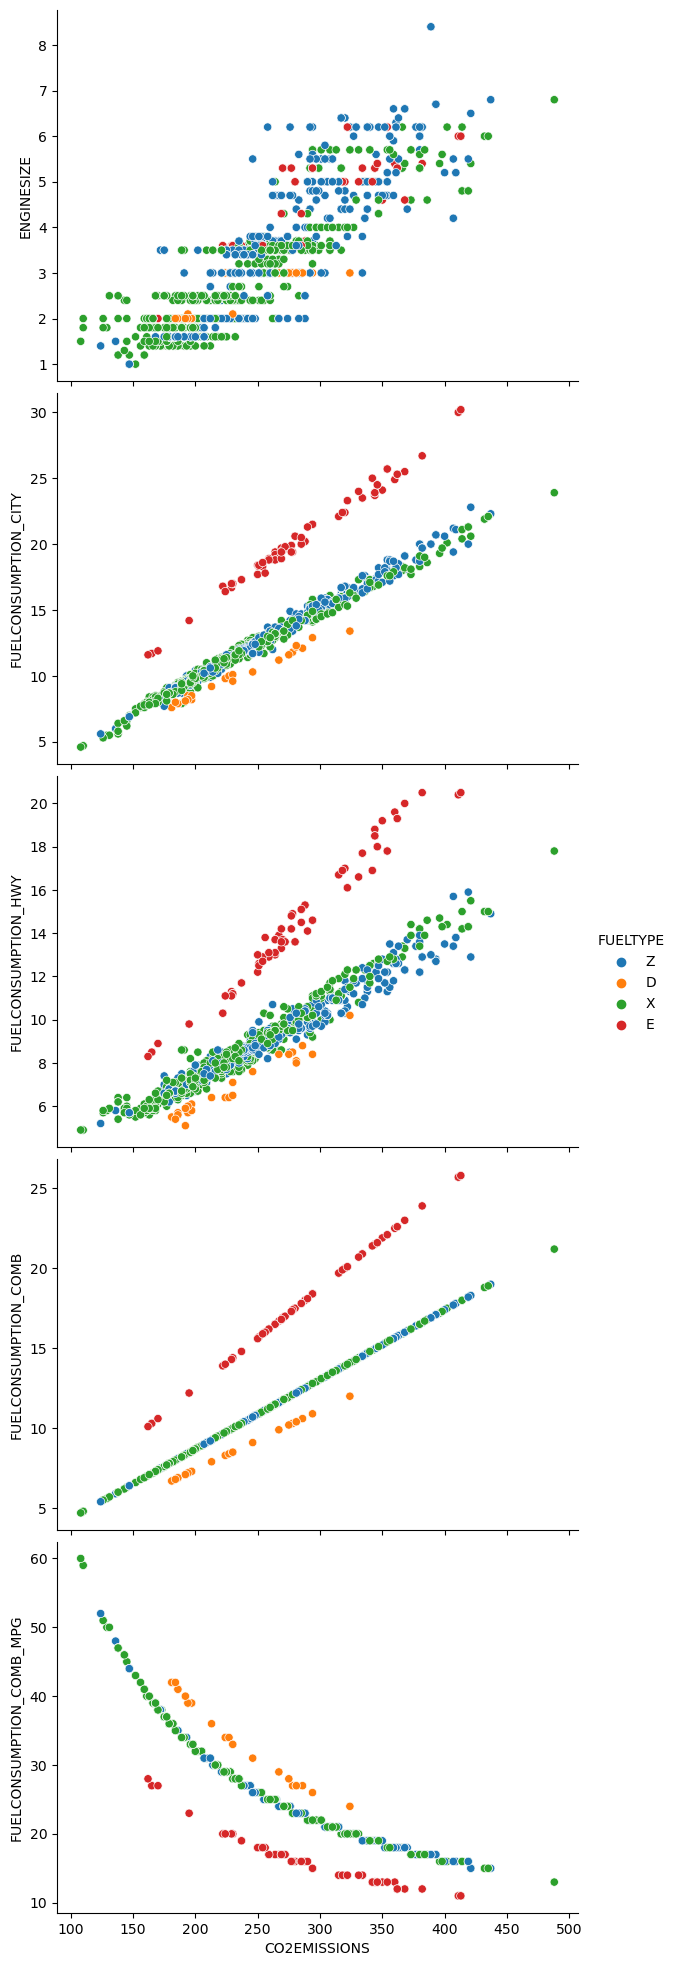

In [87]:
sns.pairplot(y_vars=num_features, x_vars=['CO2EMISSIONS'], data=co2, diag_kind = None, aspect=1.5, height=4, 
             hue='FUELTYPE')
plt.show()

- Evidently, X fuel type causes more Co2 emission when compared to other fuels

In [13]:
from sklearn.model_selection import train_test_split # to split features and target into training and testing data
from sklearn.preprocessing import StandardScaler # to scale numerical values
from sklearn.impute import SimpleImputer # to impute missing values in Data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # to convert categorical features into numberical feature
from sklearn.pipeline import Pipeline # to build a data preprocessing pipeline
from sklearn.compose import ColumnTransformer 

# Importing Regression Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing functions to calculate Accuracy and MSE of the Models
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# Creating a function to calculate Root Mean Squared Error
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

# Creating a function to get report of the Imported models
def model_report(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"{name}".center(80))
        print()
        print()
        print(f"Training Root Mean Square Error : {rmse(y_train, y_hat_train)}" )
        print(f"Test Root Mean Square Error     : {rmse(y_test, y_hat_test)}")
        print()
        print(f"Training Accuracy : {r2_score(y_train, y_hat_train)}")
        print(f"Test Accuracy     : {r2_score(y_test, y_hat_test)}")
        print()
        print()

In [88]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('standard scaler', StandardScaler()),
    ])

final_pipeline = ColumnTransformer([
    ("numerical pipeline", num_pipeline, num_features),
    ("categorical pipeline", OneHotEncoder(), cat_features),
    ('remove features', 'drop', drop_features),
])

X_tr = final_pipeline.fit_transform(X)

cat_columns = []
for i in range(len(final_pipeline.named_transformers_['categorical pipeline'].categories_)):
    cat_columns.extend(list(final_pipeline.named_transformers_['categorical pipeline'].categories_[i]))
    
columns = num_features + cat_columns

models = [
    ('Linear Regression', LinearRegression()),
    ('SGD Regressor', SGDRegressor()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Support Vector Machines', SVR()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor())
]

X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2, random_state=123)

model_report(models, X_train, X_test, y_train, y_test)


________________________________________________________________________________
                               Linear Regression                                


Training Root Mean Square Error : 4.924277137644707
Test Root Mean Square Error     : 5.610083472763409

Training Accuracy : 0.9940564660915041
Test Accuracy     : 0.99159153032664


________________________________________________________________________________
                                 SGD Regressor                                  


Training Root Mean Square Error : 5.688162885905316
Test Root Mean Square Error     : 6.7404018250206095

Training Accuracy : 0.9920694406529257
Test Accuracy     : 0.9878619229271879


________________________________________________________________________________
                            Decision Tree Regressor                             


Training Root Mean Square Error : 0.0
Test Root Mean Square Error     : 6.573452698075173

Training Accuracy : 1.0
Test Accuracy     : 0.98